In [39]:
%matplotlib nbagg
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, sem
from scipy import signal
from ipyparallel import Client
from ipyparallel import depend, require, dependent
from mpl_toolkits.mplot3d import Axes3D
from shutil import copyfile
import os
#Shape of the data
height = 256
width = 256



In [40]:
blacklist = ['20180312/Experiment_11', '20180312/Experiment_12', '20180312/Experiment_13', '20180315', '20180419/Experiment_1',\
             '20180419/Experiment_2', '20180420', '20180424', '20171031', '20171101', '20171027b']

In [41]:
#AUTOMATIC EXPERIMENT SELECTOR
directories = ["/media/gu4n1n3/Data2/2_mice/"]#, "/media/gu4n1n3/Data3/2_mice/"]

full_separation_files = []
together_files = []
label_file = ''
b_together = False
skip = False
for directory in directories:
    for root, dirs, files in os.walk(directory):
        if "Experiment" in root and "Behaviour" not in root:
            for bl_file in blacklist:
                if bl_file in root:
                    skip = True
                    break
                else:
                    skip = False
            for file in files:
                if '.npy' in file and '12mm' in file:
                    b_together = True
                elif '.npy' in file and 'full_separation' in file:
                    b_together = False
            if not skip:
                for file in files:
                    if 'TRUNCATED.npy' in file:
                        if b_together:
                            together_files.append(os.path.join(root,file))
                        else:
                            full_separation_files.append(os.path.join(root,file))
                            
                            
                    else:
                        if "labels" in file:
                            label_file = (root+"/"+file)
                            
                


In [22]:
label_file

'/media/gu4n1n3/Data2/2_mice/20180316/Experiment_1/the_seed_labels.npy'

In [42]:
together_matrices = []
for together_file in together_files:
    mat = np.load(together_file)
    together_matrices.append(mat)
    

separate_matrices = []
for separate_file in full_separation_files:
    mat = np.load(separate_file)
    separate_matrices.append(mat)
#     src = cm_file.replace(".npy", ".svg")
#     dest = cm_file.split("/")
#     dest[6] = folder
#     dest = "/".join(dest)
#     dest = dest.replace('.npy', ".svg")
#     copyfile(src, dest)
    
# calculate average'
#print(np.shape(ncm_matrices))
together_mean = np.mean(together_matrices, axis=0)
separate_mean = np.mean(separate_matrices, axis=0)

together_std = np.std(together_matrices, axis=0)
separate_std = np.std(separate_matrices, axis=0)

#Load Lables
the_labels = np.load(label_file)
n_lables = np.size(the_labels)
print(the_labels)
print(n_lables)

['M1-L-L' 'M1-R-L' 'FL-L-L' 'FL-R-L' 'HL-L-L' 'HL-R-L' 'aBC-L-L' 'aBC-R-L'
 'pBC-L-L' 'pBC-R-L' 'AC-L-L' 'AC-R-L' 'RS-L-L' 'RS-R-L' 'V1-L-L' 'V1-R-L'
 'mPTA-L-L' 'mPTA-R-L' 'lPTA-L-L' 'lPTA-R-L' 'Un-L-L' 'Un-R-L' 'M1-L-R'
 'M1-R-R' 'FL-L-R' 'FL-R-R' 'HL-L-R' 'HL-R-R' 'aBC-L-R' 'aBC-R-R'
 'pBC-L-R' 'pBC-R-R' 'AC-L-R' 'AC-R-R' 'RS-L-R' 'RS-R-R' 'V1-L-R' 'V1-R-R'
 'mPTA-L-R' 'mPTA-R-R' 'lPTA-L-R' 'lPTA-R-R' 'Un-L-R' 'Un-R-R']
44


<IPython.core.display.Javascript object>


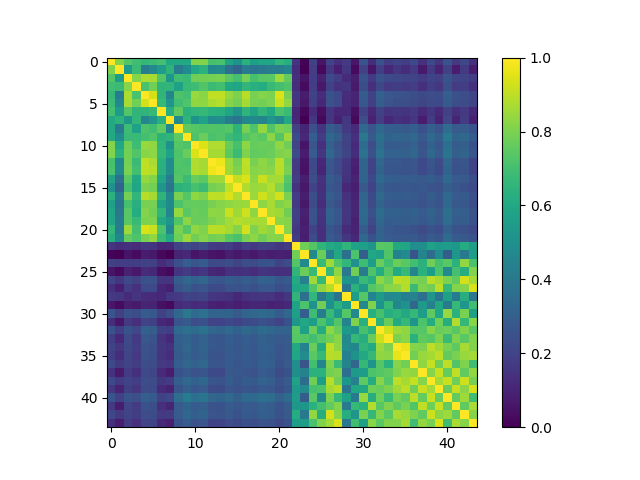

In [44]:
plt.figure()
plt.imshow(together_mean, vmin=0, vmax=1)
plt.colorbar()

<IPython.core.display.Javascript object>


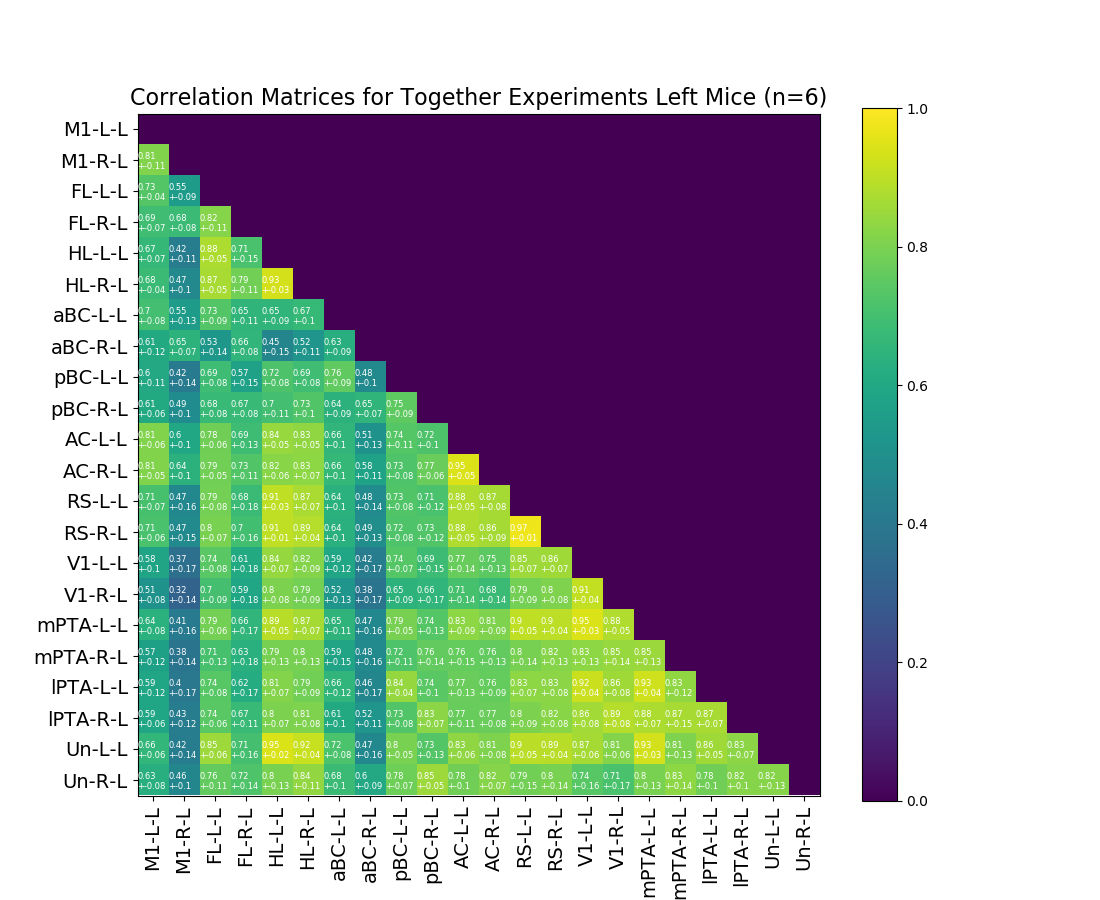

<IPython.core.display.Javascript object>


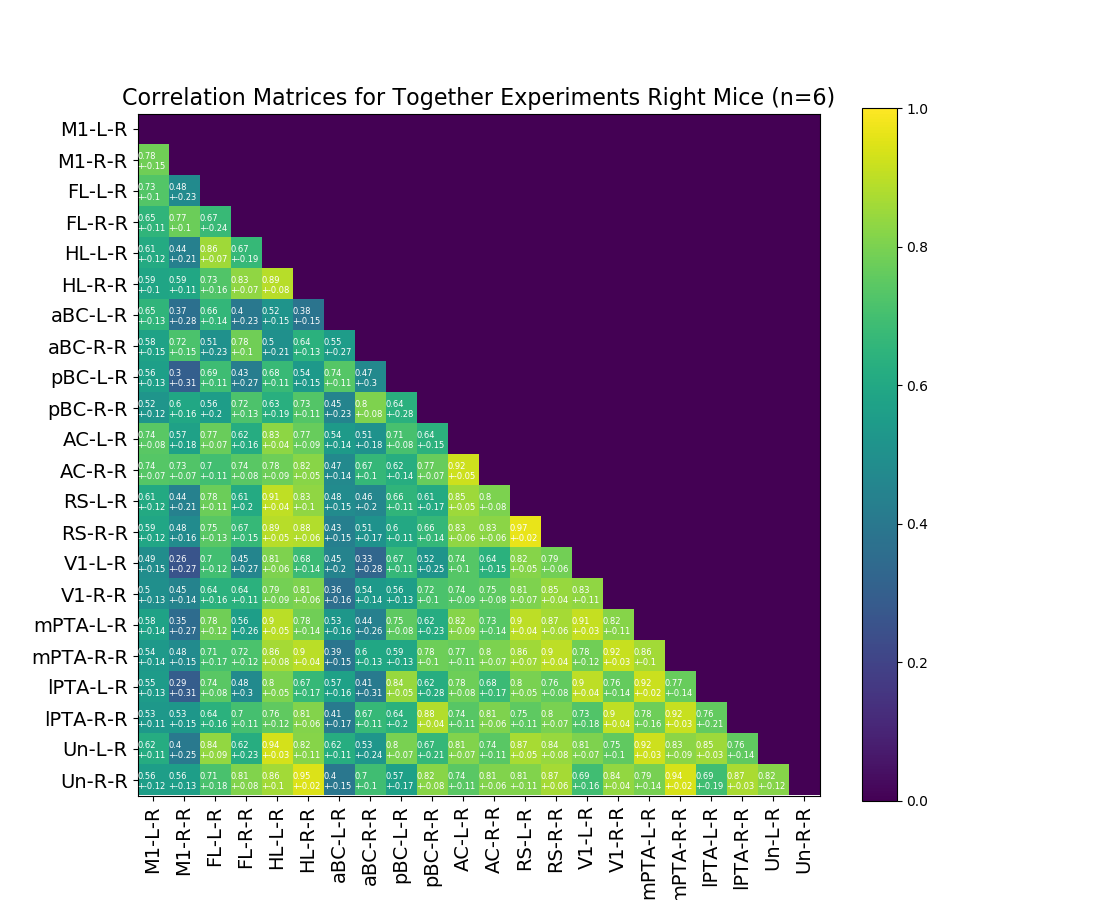

<IPython.core.display.Javascript object>


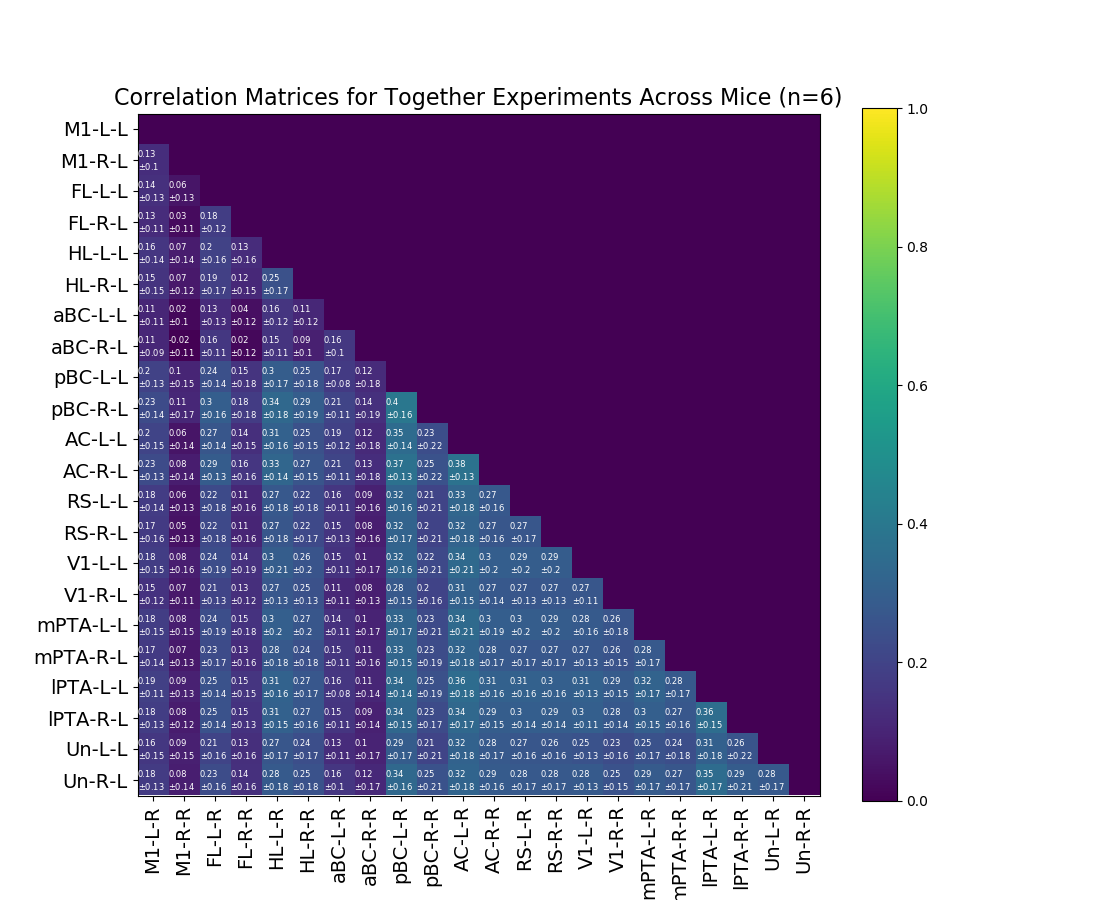

In [61]:
left_mouse_cm_mean = together_mean[:n_lables//2,:n_lables//2]
right_mouse_cm_mean = together_mean[n_lables//2:,n_lables//2:]
cross_mouse_cm_mean = together_mean[:n_lables//2, n_lables//2:]

left_mouse_cm_sem = together_std[:n_lables//2,:n_lables//2]
right_mouse_cm_sem = together_std[n_lables//2:,n_lables//2:]
cross_mouse_cm_sem = together_std[:n_lables//2, n_lables//2:]

plt.figure(figsize=(11, 9))
plt.imshow(np.tril(left_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title("Correlation Matrices for Together Experiments Left Mice (n=%s)" % str(len(together_files)), size=16)
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[:n_lables//2], rotation='vertical', size=14)
plt.yticks(ticks, the_labels[:n_lables//2], size=14)
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(left_mouse_cm_mean[i, j],2))+"\n+-"+str(np.round(left_mouse_cm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.colorbar()
plt.savefig(directory+"left_mice_together_matrices.png")    

plt.figure(figsize=(11, 9))
plt.imshow(np.tril(right_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title("Correlation Matrices for Together Experiments Right Mice (n=%s)" % str(len(full_separation_files)), size=16)
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical', size=14)
plt.yticks(ticks, the_labels[n_lables//2:], size=14)
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(right_mouse_cm_mean[i, j],2))+"\n+-"+str(np.round(right_mouse_cm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
        
plt.colorbar()
plt.savefig(directory+"right_mice_together_matrices.png")

plt.figure(figsize=(11, 9))
plt.imshow(np.tril(cross_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title("Correlation Matrices for Together Experiments Across Mice (n=%s)" %str(len(full_separation_files)), size=16)
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical', size=14)
plt.yticks(ticks, the_labels[:n_lables//2], size=14)
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(cross_mouse_cm_mean[i, j],2))+"\n"+r'$\pm$'+str(np.round(cross_mouse_cm_sem[i, j],2)),
                 fontsize=6,
                 color='white')
plt.colorbar()
plt.savefig(directory+"across_mice_together_experiments.png")

<IPython.core.display.Javascript object>


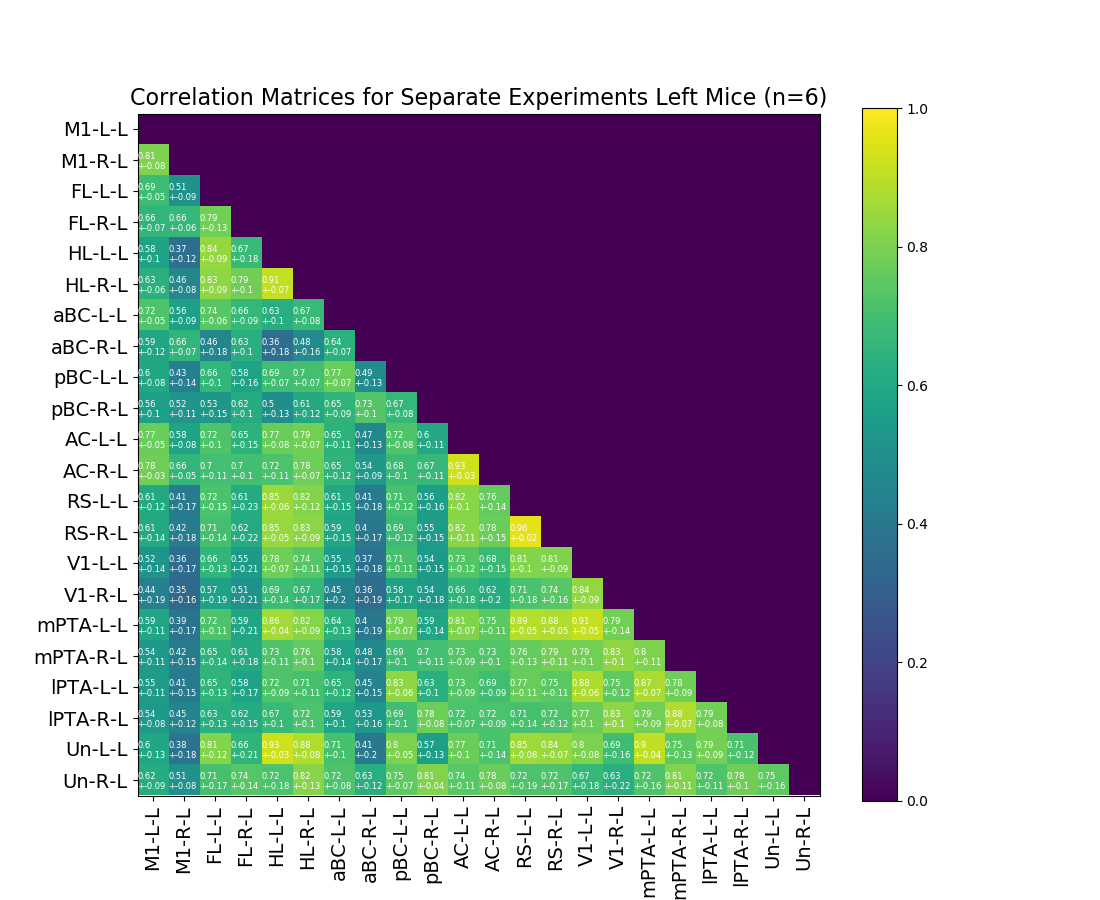

<IPython.core.display.Javascript object>


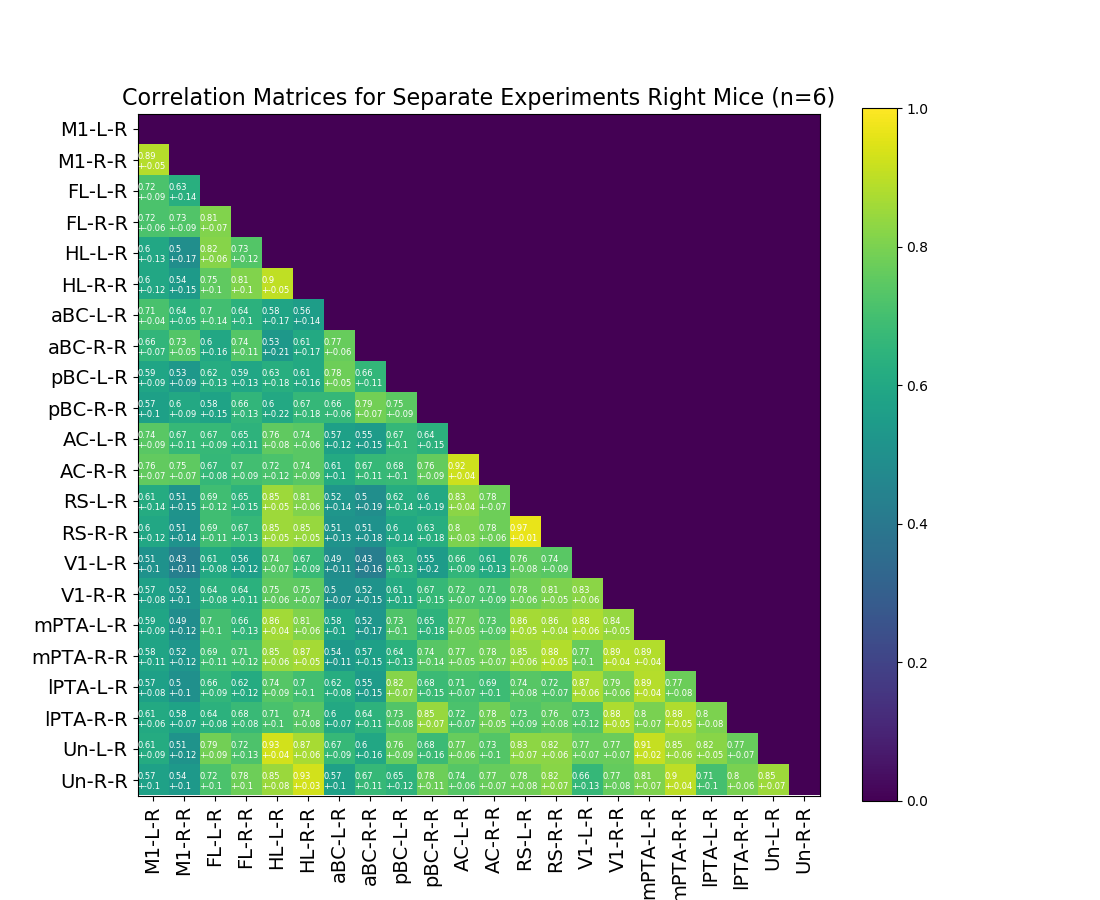

<IPython.core.display.Javascript object>


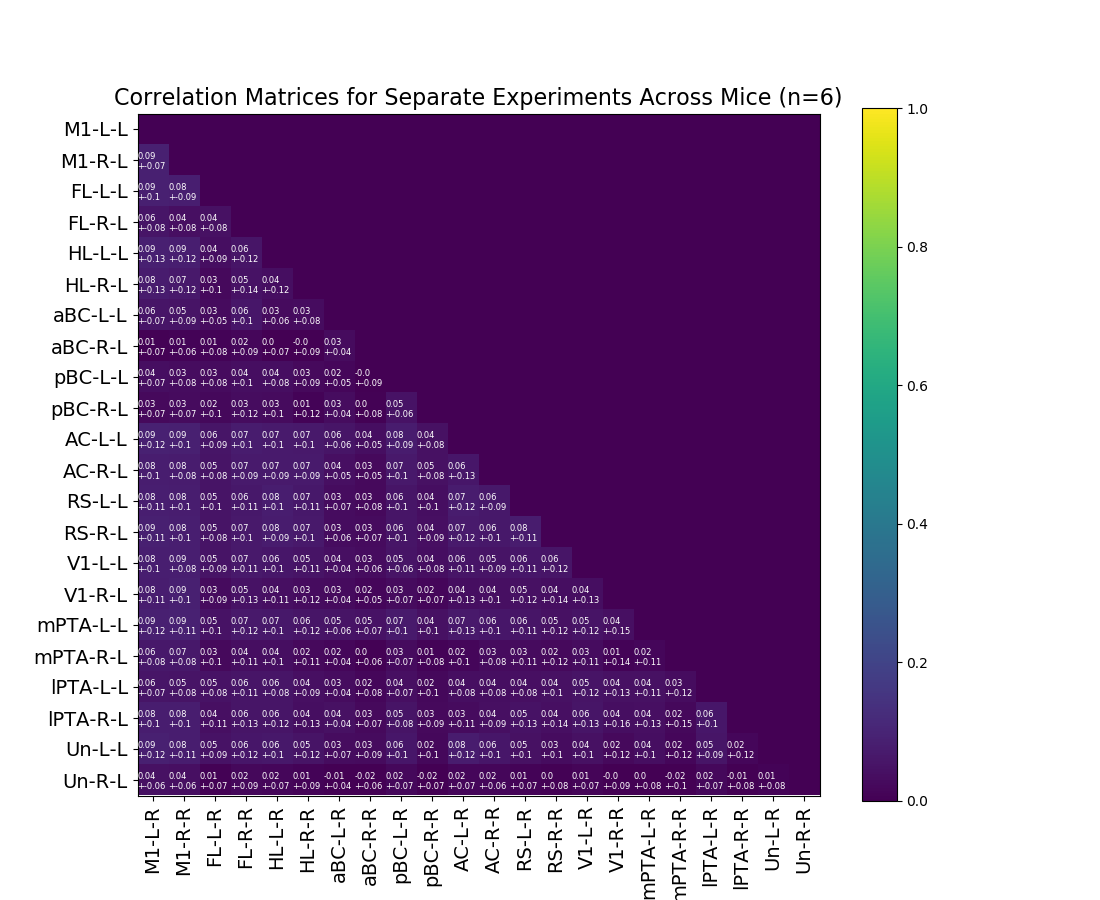

In [62]:
left_mouse_ncm_mean = separate_mean[:n_lables//2,:n_lables//2]
right_mouse_ncm_mean = separate_mean[n_lables//2:,n_lables//2:]
cross_mouse_ncm_mean = separate_mean[:n_lables//2, n_lables//2:]

left_mouse_ncm_sem = separate_std[:n_lables//2,:n_lables//2]
right_mouse_ncm_sem = separate_std[n_lables//2:,n_lables//2:]
cross_mouse_ncm_sem = separate_std[:n_lables//2, n_lables//2:]

plt.figure(figsize=(11, 9))
plt.imshow(np.tril(left_mouse_ncm_mean, -1), vmin=0, vmax=1)
plt.title("Correlation Matrices for Separate Experiments Left Mice (n=%s)" % str(len(together_files)), size=16)
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[:n_lables//2], rotation='vertical', size=14)
plt.yticks(ticks, the_labels[:n_lables//2], size=14)
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(left_mouse_ncm_mean[i, j],2))+"\n+-"+str(np.round(left_mouse_ncm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.colorbar()
plt.savefig(directory+"left_mice_separate_matrices.png")

plt.figure(figsize=(11, 9))
plt.imshow(np.tril(right_mouse_ncm_mean, -1), vmin=0, vmax=1)
plt.title("Correlation Matrices for Separate Experiments Right Mice (n=%s)" % str(len(together_files)), size=16)
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical', size=14)
plt.yticks(ticks, the_labels[n_lables//2:], size=14)
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(right_mouse_ncm_mean[i, j],2))+"\n+-"+str(np.round(right_mouse_ncm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.colorbar()
plt.savefig(directory+"right_mice_separate_matrices.png")

plt.figure(figsize=(11, 9))
plt.imshow(np.tril(cross_mouse_ncm_mean, -1), vmin=0, vmax=1)
plt.title("Correlation Matrices for Separate Experiments Across Mice (n=%s)" %str(len(full_separation_files)), size=16)
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical', size=14)
plt.yticks(ticks, the_labels[:n_lables//2], size=14)
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(cross_mouse_ncm_mean[i, j],2))+"\n+-"+str(np.round(cross_mouse_ncm_sem[i, j],2)),
                 fontsize=6,
                 color='white')
plt.colorbar()
plt.savefig(directory+"across_mice_separate_matrices.png")

<IPython.core.display.Javascript object>


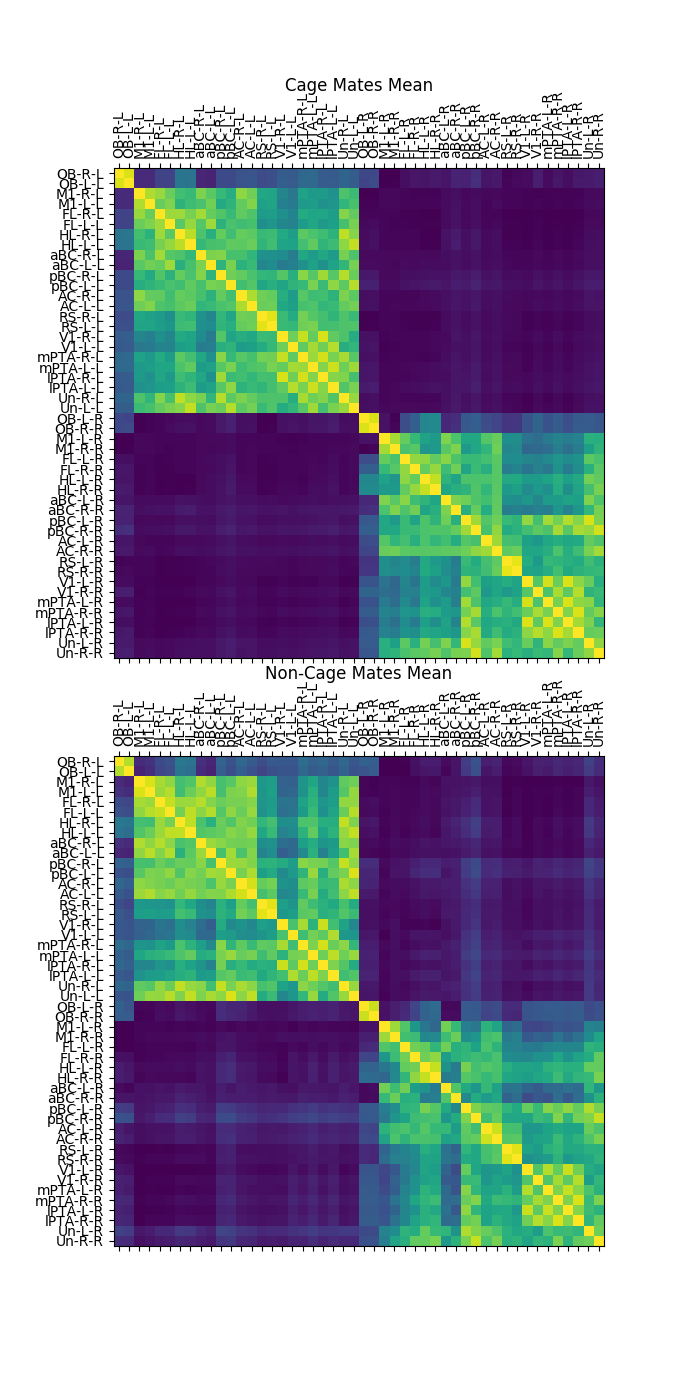

In [10]:
fig, ax = plt.subplots(2,1, figsize=(7,14))
ax[0].matshow(cm_mean, vmin=0, vmax=1, cmap='viridis')
ax[0].set_title("Cage Mates Mean", y=1.14)
ax[0].set_yticks([i for i in range(len(the_labels))])
ax[0].set_xticks([i for i in range(len(the_labels))])
ax[0].set_xticklabels(the_labels, rotation='vertical')
ax[0].set_yticklabels(the_labels)

ax[1].matshow(ncm_mean, vmin=0, vmax=1, cmap='viridis')
ax[1].set_title("Non-Cage Mates Mean", y=1.14)
ax[1].set_yticks([i for i in range(len(the_labels))])
ax[1].set_xticks([i for i in range(len(the_labels))])
ax[1].set_xticklabels(the_labels, rotation='vertical')
ax[1].set_yticklabels(the_labels)
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(7,14))
ax[0].matshow(cm_sem, vmin=0, vmax=0.035, cmap='viridis')
ax[0].set_title("Cage Mates Sem", y=1.14)
ax[0].set_yticks([i for i in range(len(the_labels))])
ax[0].set_xticks([i for i in range(len(the_labels))])
ax[0].set_xticklabels(the_labels, rotation='vertical')
ax[0].set_yticklabels(the_labels)

ax[1].matshow(ncm_sem,  vmin=0, vmax=0.035, cmap='viridis')
ax[1].set_title("Non-Cage Mates Sem", y=1.14)
ax[1].set_yticks([i for i in range(len(the_labels))])
ax[1].set_xticks([i for i in range(len(the_labels))])
ax[1].set_xticklabels(the_labels, rotation='vertical')
ax[1].set_yticklabels(the_labels)

In [ ]:
import cv2
cm_mean_color = cv2.cvtColor(cm_mean.astype(np.float32),cv2.COLOR_GRAY2RGB)
ncm_mean_color = cv2.cvtColor(ncm_mean.astype(np.float32), cv2.COLOR_GRAY2RGB)

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 1, 1, projection='3d')
x0, y0 = np.mgrid[0:cm_mean.shape[0], 0:cm_mean.shape[1]]
ax0.plot_surface(x0, y0, cm_sem, rstride=1, cstride=1, cmap='viridis')

x1, y1 = np.mgrid[0:ncm_mean.shape[0], 0:ncm_mean.shape[1]]
ax1 = fig.add_subplot(2, 1, 2, projection='3d')
ax1.plot_surface(x, y, ncm_sem, rstride=1, cstride=1, cmap='viridis')
ax1.set_zlim()